In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# 1. Charger le dataset
df = pd.read_csv("./../données/dataset_tfhe_execution_times5.csv")

In [5]:
# 2. Nettoyage de données
df = df.dropna(subset=["temps_s", "operation", "param_tfhe", "type_donnee", "nb_chiffres"])

In [6]:
# 3. Sélection des variables
X_raw = df[["operation", "param_tfhe", "type_donnee", "nb_chiffres"]]
y = df["temps_s"]

In [7]:
# 4. Encodage one-hot des variables catégorielles
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_raw[["operation", "param_tfhe", "type_donnee"]])
X_numeric = X_raw[["nb_chiffres"]].values

In [8]:
# 5. Concaténation des features encodées et numériques
X = np.concatenate([X_encoded, X_numeric], axis=1)

In [9]:
# 6. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 7. Entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# 8. Évaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.6f} s")
print(f"R²: {r2:.4f}")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1.491640 s
R²: 0.9998
RMSE: 13.681090403694693


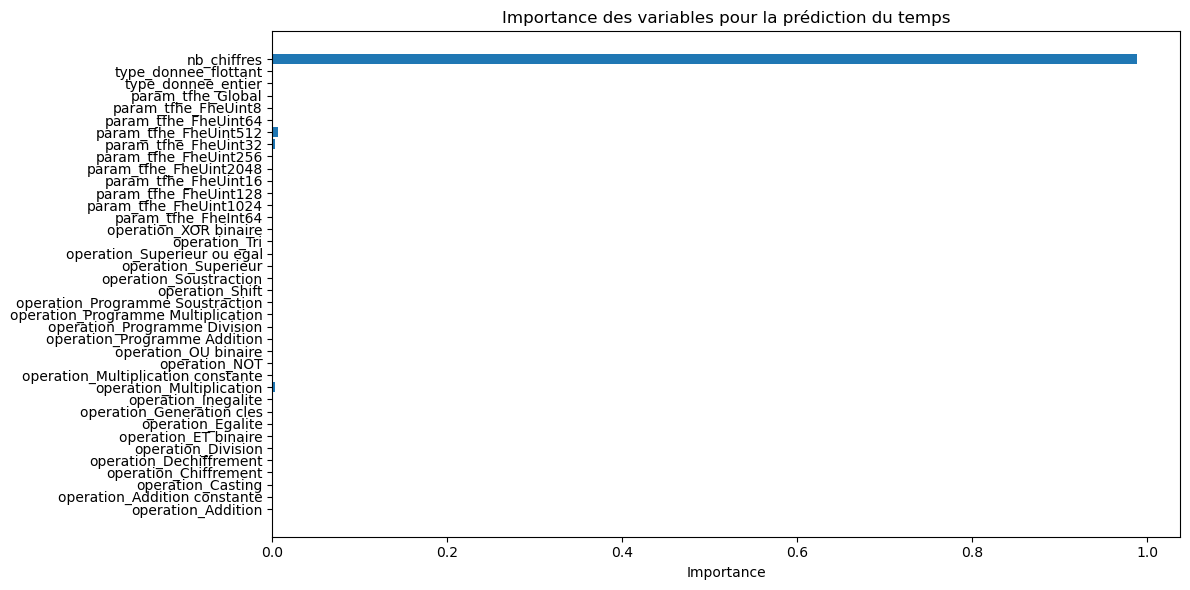

In [12]:
# 9. Importance des variables
feature_names = list(encoder.get_feature_names_out(["operation", "param_tfhe", "type_donnee"])) + ["nb_chiffres"]
importances = model.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Importance des variables pour la prédiction du temps")
plt.tight_layout()
plt.show()

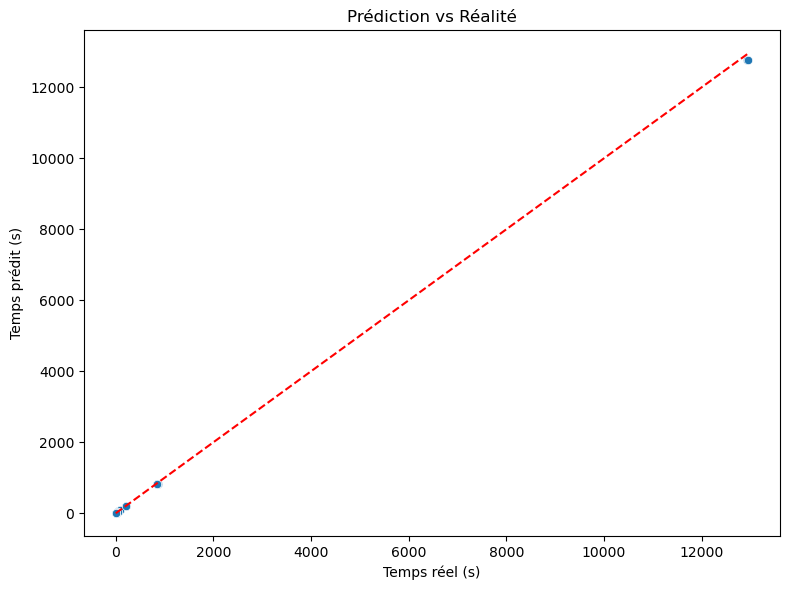

In [13]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel("Temps réel (s)")
plt.ylabel("Temps prédit (s)")
plt.title("Prédiction vs Réalité")
plt.tight_layout()
plt.show()

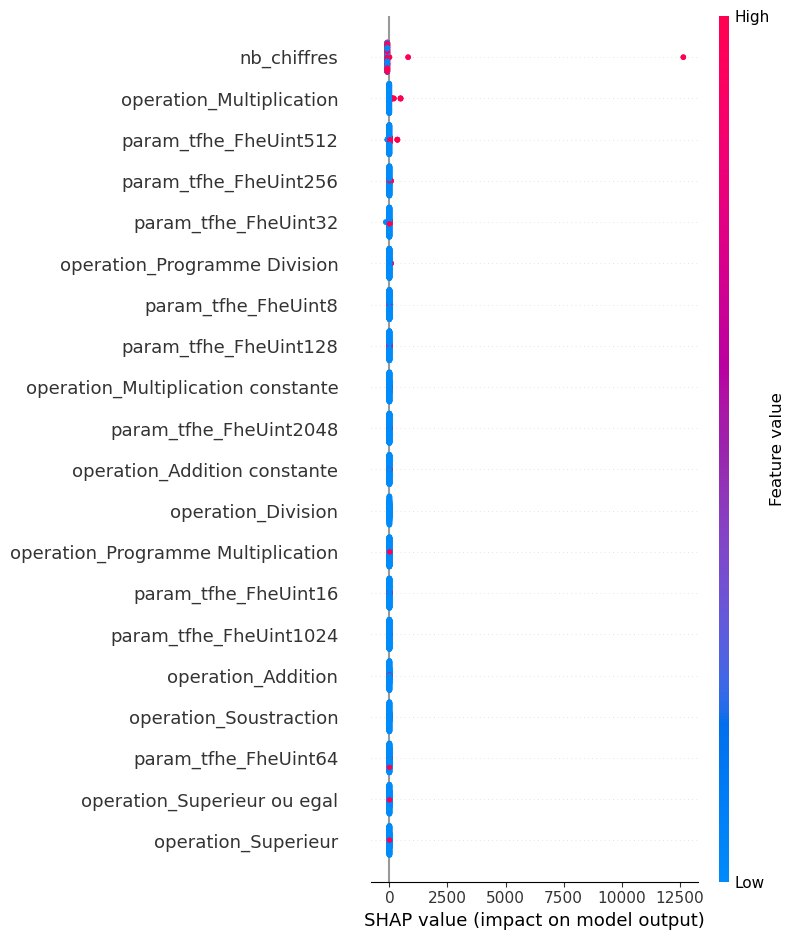

In [14]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [15]:
# Régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédiction
y_pred_linear = linear_model.predict(X_test)

# Évaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Régression linéaire - MAE: {mae_linear:.6f} s")
print(f"Régression linéaire - R²: {r2_linear:.4f}")
print(f"Régression linéaire - RMSE: {rmse_linear:.6f}")

# Affichage de l'équation
coeffs = linear_model.coef_
intercept = linear_model.intercept_
feature_names = list(encoder.get_feature_names_out(["operation", "param_tfhe", "type_donnee"])) + ["nb_chiffres"]
equation = " + ".join([f"{coef:.6f}*{name}" for coef, name in zip(coeffs, feature_names)])
print(f"Équation: temps_s = {intercept:.6f} + {equation}")


Régression linéaire - MAE: 33.577183 s
Régression linéaire - R²: 0.9891
Régression linéaire - RMSE: 96.867713
Équation: temps_s = -40.464636 + 10.891787*operation_Addition + 25.263613*operation_Addition constante + 15.374054*operation_Casting + 16.595644*operation_Chiffrement + 16.539718*operation_Dechiffrement + 99.891132*operation_Division + 12.496211*operation_ET binaire + 8.418774*operation_Egalite + 19.231706*operation_Generation cles + 8.576883*operation_Inegalite + 221.865941*operation_Multiplication + 23.547629*operation_Multiplication constante + 16.443781*operation_NOT + 13.477832*operation_OU binaire + 19.755908*operation_Programme Addition + 93.164985*operation_Programme Division + 31.781700*operation_Programme Multiplication + 19.727900*operation_Programme Soustraction + 15.614534*operation_Shift + 11.145251*operation_Soustraction + 6.867820*operation_Superieur + 8.708469*operation_Superieur ou egal + -720.393560*operation_Tri + 5.012289*operation_XOR binaire + -2.810513*p